#Import

In [1]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2
!pip install scikeras

Found existing installation: scikit-learn 1.6.0
Uninstalling scikit-learn-1.6.0:
  Successfully uninstalled scikit-learn-1.6.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 79.0 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, log_loss, cohen_kappa_score, matthews_corrcoef, roc_auc_score
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Layer, Reshape, RepeatVector, TimeDistributed, Conv2D, GRU, MaxPooling2D, LSTM, Dense, Dropout, Input, Reshape, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier
import seaborn as sns

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
X_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_test.csv')
X_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_val.csv')
y_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_val.csv')

Checking Available GPUs

In [5]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)

Num GPUs Available:  1


#Keras Deep Learning Model

In [6]:
def create_keras_model(input_shape):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

###10 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 74s 2ms/step - accuracy: 0.9975 - loss: 0.0067 - val_accuracy: 0.2070 - val_loss: 25.9924
Epoch 2/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 1.0000 - loss: 8.8740e-11 - val_accuracy: 0.2070 - val_loss: 28.9655
Epoch 3/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 1.0000 - loss: 6.2558e-11 - val_accuracy: 0.2070 - val_loss: 34.1819
Epoch 4/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 1.0000 - loss: 9.6465e-12 - val_accuracy: 0.2070 - val_loss: 29.9472
Epoch 5/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 1.0000 - loss: 4.9875e-12 - val_accuracy: 0.2070 - val_loss: 33.1533
Epoch 6/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - accuracy: 1.0000 - loss: 7.0918e-12 - val_accuracy: 0.2070 - val_loss: 36.2417
Epoch 7/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - accuracy: 1.0000 - loss: 7.0766e-12 - val_accuracy: 0.2070 - val_loss: 31.6461
Epoch 8/10
35552/35552 ━━━━━━━━━━━━━━━

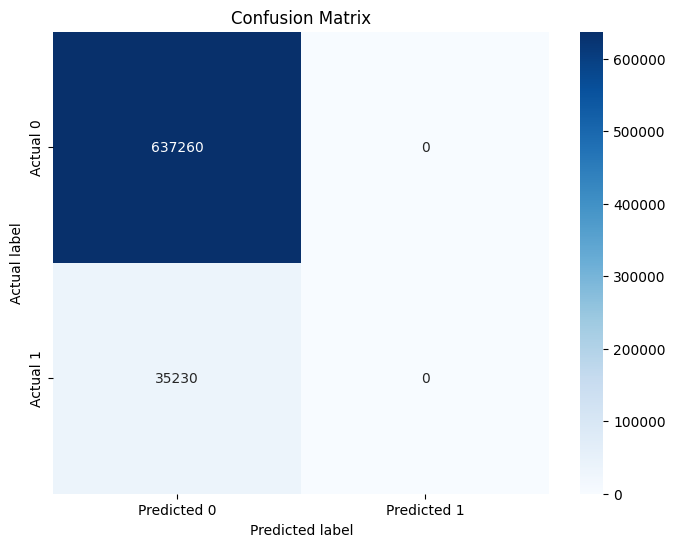

21016/21016 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step


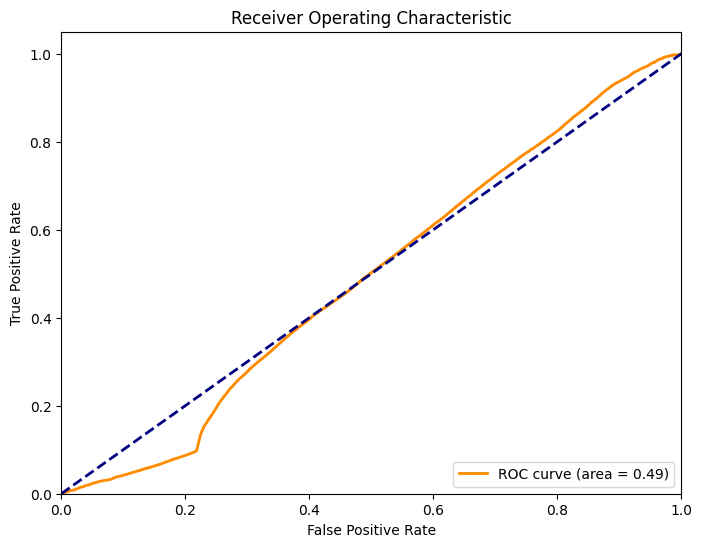

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Metric,Value
0,Accuracy,0.947613
1,Precision,0.000000
2,Recall,0.000000
3,F1-Score,0.000000
4,TPR,0.000000
5,FPR,0.000000
6,TNR,1.000000
7,FNR,1.000000
8,Youden's J,0.000000


In [7]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)


input_shape = (X_train.shape[1],)
model = create_keras_model(input_shape)

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred_keras = (model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred_keras)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test, y_pred_keras)
precision = precision_score(y_test, y_pred_keras)
recall = recall_score(y_test, y_pred_keras)
f1 = f1_score(y_test, y_pred_keras)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
metrics_df

6504/6504 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


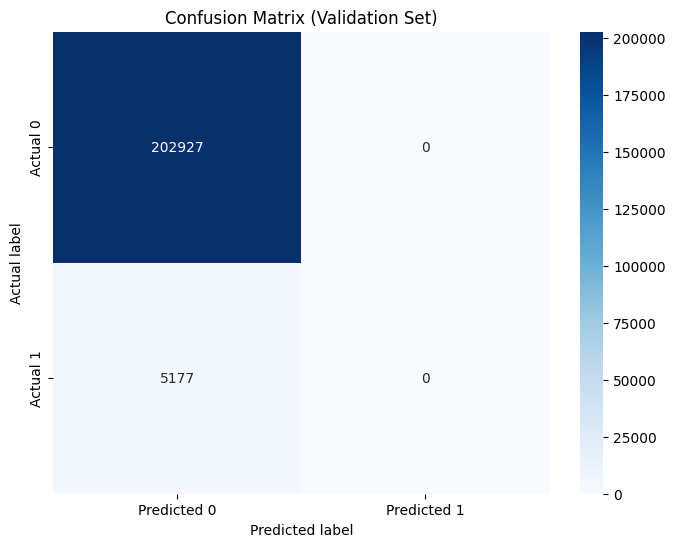

6504/6504 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


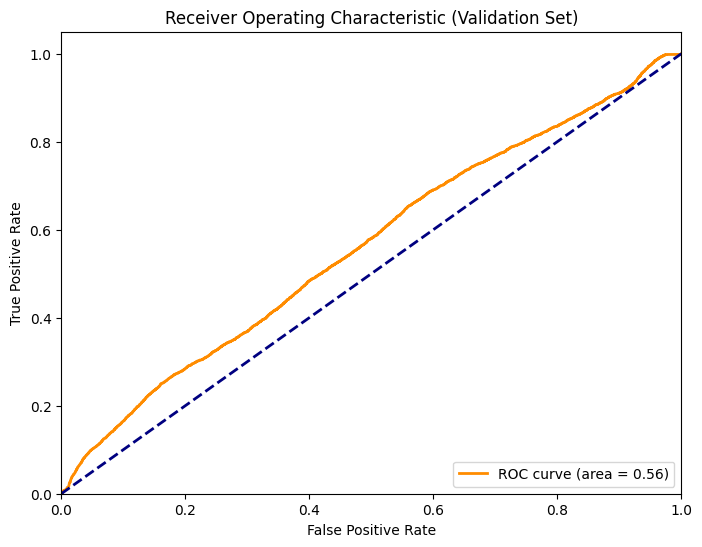

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Metric,Value
0,Accuracy,0.975123
1,Precision,0.000000
2,Recall,0.000000
3,F1-Score,0.000000
4,TPR,0.000000
5,FPR,0.000000
6,TNR,1.000000
7,FNR,1.000000
8,Youden's J,0.000000


In [8]:
y_pred_keras_val = (model.predict(X_val) > 0.5).astype("int32")

cm_val = confusion_matrix(y_val, y_pred_keras_val)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Validation Set)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob_val = model.predict(X_val)
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_pred_prob_val)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Validation Set)')
plt.legend(loc="lower right")
plt.show()

accuracy_val = accuracy_score(y_val, y_pred_keras_val)
precision_val = precision_score(y_val, y_pred_keras_val)
recall_val = recall_score(y_val, y_pred_keras_val)
f1_val = f1_score(y_val, y_pred_keras_val)
tn_val, fp_val, fn_val, tp_val = cm_val.ravel()
tpr_val = tp_val / (tp_val + fn_val)
fpr_val = fp_val / (fp_val + tn_val)
tnr_val = tn_val / (tn_val + fp_val)
fnr_val = fn_val / (tp_val + fn_val)
j_val = tpr_val - fpr_val

metrics_val = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy_val, precision_val, recall_val, f1_val, tpr_val, fpr_val, tnr_val, fnr_val, j_val]
}
metrics_df_val = pd.DataFrame(metrics_val)
metrics_df_val

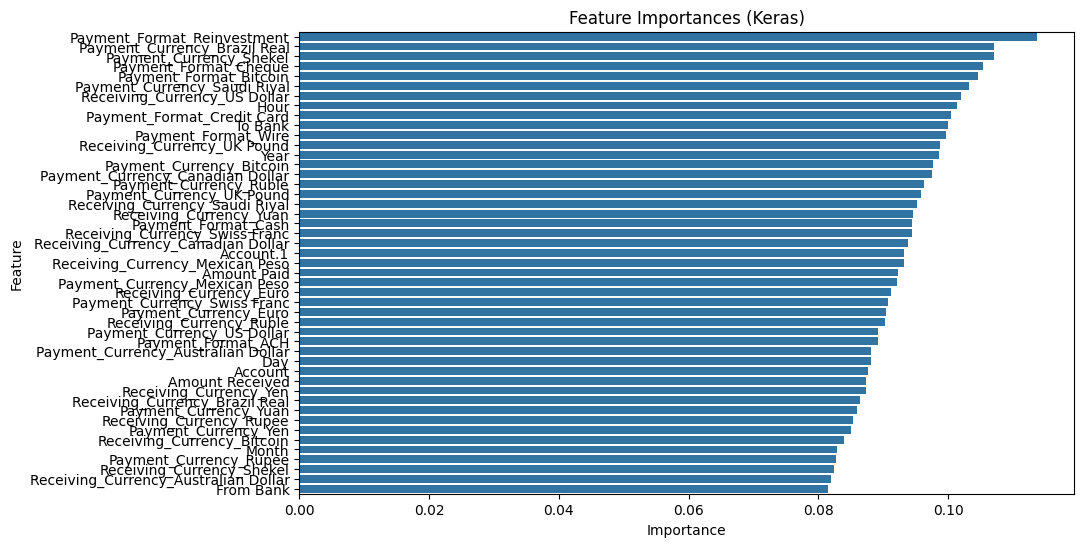

In [9]:
X_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_train.csv')

lstm_weights = model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:X_train.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (Keras)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

###30 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 72s 2ms/step - accuracy: 0.9974 - loss: 0.0064 - val_accuracy: 0.2070 - val_loss: 26.7198
Epoch 2/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 1.0000 - loss: 7.5714e-11 - val_accuracy: 0.2070 - val_loss: 28.8687
Epoch 3/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 1.0000 - loss: 1.9418e-11 - val_accuracy: 0.2070 - val_loss: 33.9084
Epoch 4/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 1.0000 - loss: 1.0469e-11 - val_accuracy: 0.2070 - val_loss: 33.2208
Epoch 5/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 1.0000 - loss: 7.8516e-12 - val_accuracy: 0.2070 - val_loss: 31.8381
Epoch 6/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 1.0000 - loss: 2.5752e-10 - val_accuracy: 0.2070 - val_loss: 33.7262
Epoch 7/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 1.0000 - loss: 9.7062e-12 - val_accuracy: 0.2070 - val_loss: 32.2122
Epoch 8/30
35552/35552 ━━━━━━━━━━━━━━━

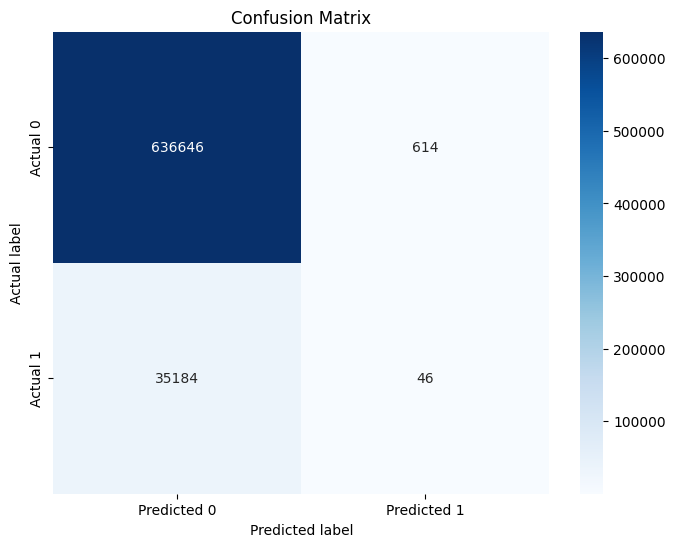

21016/21016 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step


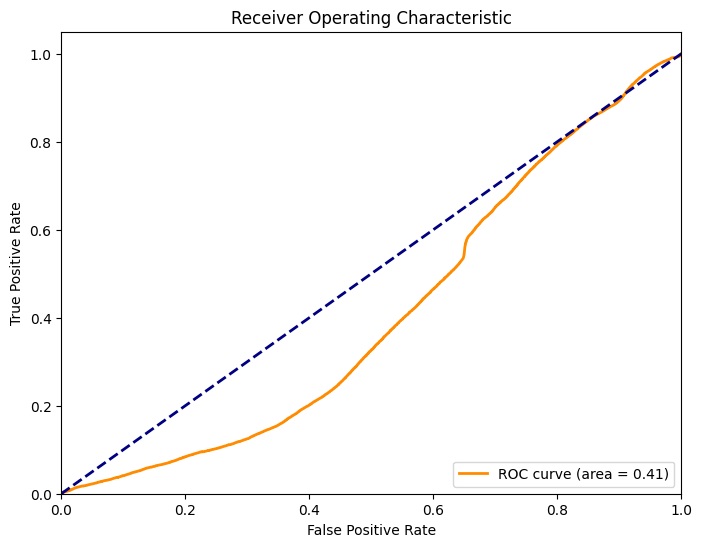

,Metric,Value
0,Accuracy,0.946768
1,Precision,0.069697
2,Recall,0.001306
3,F1-Score,0.002563
4,TPR,0.001306
5,FPR,0.000963
6,TNR,0.999037
7,FNR,0.998694
8,Youden's J,0.000342


In [11]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)


input_shape = (X_train.shape[1],)
model = create_keras_model(input_shape)

model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

y_pred_keras = (model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred_keras)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test, y_pred_keras)
precision = precision_score(y_test, y_pred_keras)
recall = recall_score(y_test, y_pred_keras)
f1 = f1_score(y_test, y_pred_keras)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
metrics_df

6504/6504 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


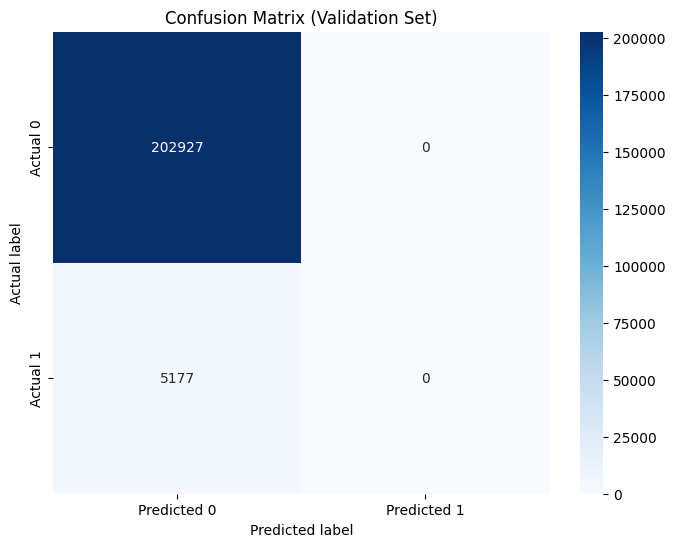

6504/6504 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


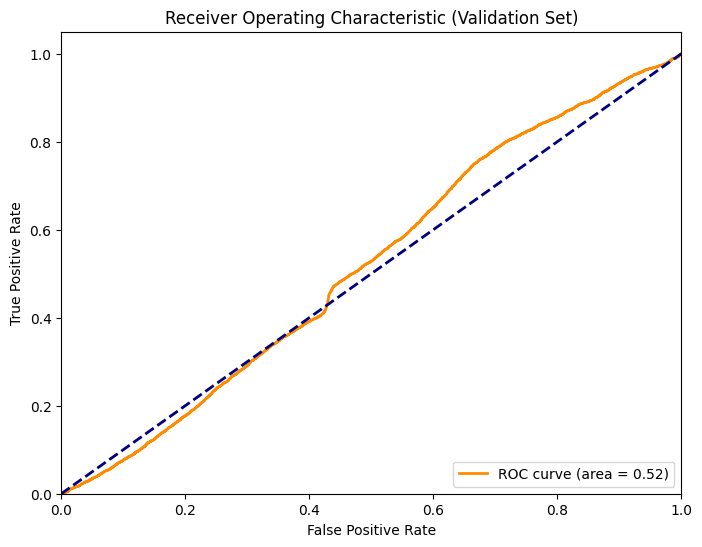

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Metric,Value
0,Accuracy,0.975123
1,Precision,0.000000
2,Recall,0.000000
3,F1-Score,0.000000
4,TPR,0.000000
5,FPR,0.000000
6,TNR,1.000000
7,FNR,1.000000
8,Youden's J,0.000000


In [12]:
y_pred_keras_val = (model.predict(X_val) > 0.5).astype("int32")

cm_val = confusion_matrix(y_val, y_pred_keras_val)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Validation Set)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob_val = model.predict(X_val)
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_pred_prob_val)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Validation Set)')
plt.legend(loc="lower right")
plt.show()

accuracy_val = accuracy_score(y_val, y_pred_keras_val)
precision_val = precision_score(y_val, y_pred_keras_val)
recall_val = recall_score(y_val, y_pred_keras_val)
f1_val = f1_score(y_val, y_pred_keras_val)
tn_val, fp_val, fn_val, tp_val = cm_val.ravel()
tpr_val = tp_val / (tp_val + fn_val)
fpr_val = fp_val / (fp_val + tn_val)
tnr_val = tn_val / (tn_val + fp_val)
fnr_val = fn_val / (tp_val + fn_val)
j_val = tpr_val - fpr_val

metrics_val = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy_val, precision_val, recall_val, f1_val, tpr_val, fpr_val, tnr_val, fnr_val, j_val]
}
metrics_df_val = pd.DataFrame(metrics_val)
metrics_df_val

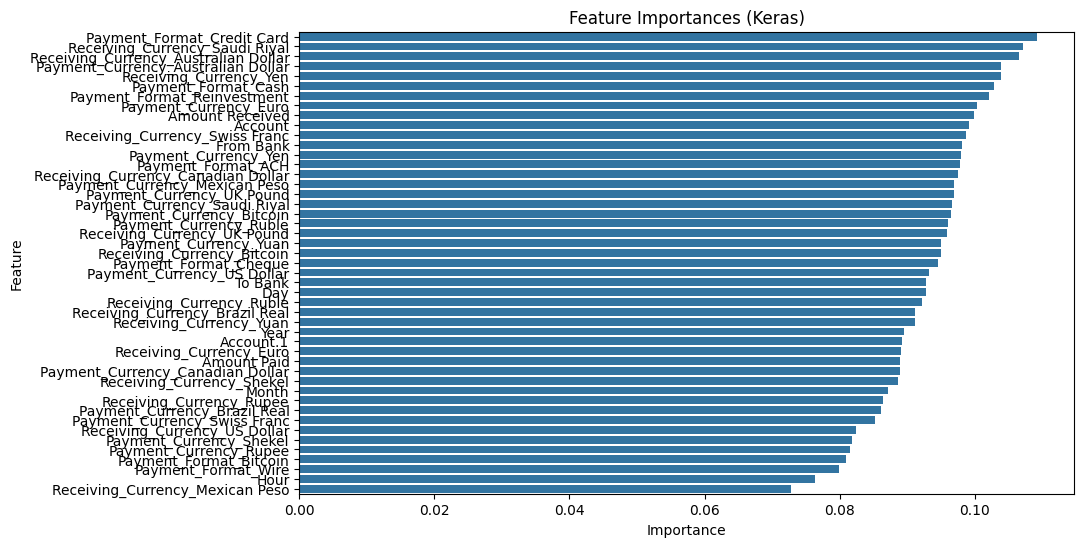

In [13]:
X_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_train.csv')

lstm_weights = model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:X_train.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (Keras)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#Recurrent Neural Networks (RNNs)

In [14]:
def create_rnn_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.3))
    model.add(LSTM(64, activation='relu', return_sequences=False))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

###10 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - accuracy: 0.9994 - loss: 0.0053 - val_accuracy: 0.2070 - val_loss: 24.5191
Epoch 2/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 1.0000 - loss: 4.2794e-11 - val_accuracy: 0.2070 - val_loss: 25.2615
Epoch 3/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 1.0000 - loss: 8.5842e-12 - val_accuracy: 0.2070 - val_loss: 28.6114
Epoch 4/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 1.0000 - loss: 5.4584e-12 - val_accuracy: 0.2070 - val_loss: 23.6947
Epoch 5/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 1.0000 - loss: 6.6493e-12 - val_accuracy: 0.2070 - val_loss: 25.2466
Epoch 6/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 1.0000 - loss: 4.1505e-12 - val_accuracy: 0.2070 - val_loss: 26.0091
Epoch 7/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 1.0000 - loss: 2.6689e-12 - val_accuracy: 0.2070 - val_loss: 26.9879
Epoch 8/10
35552/35552 ━━━━━━━━━━━━━━━

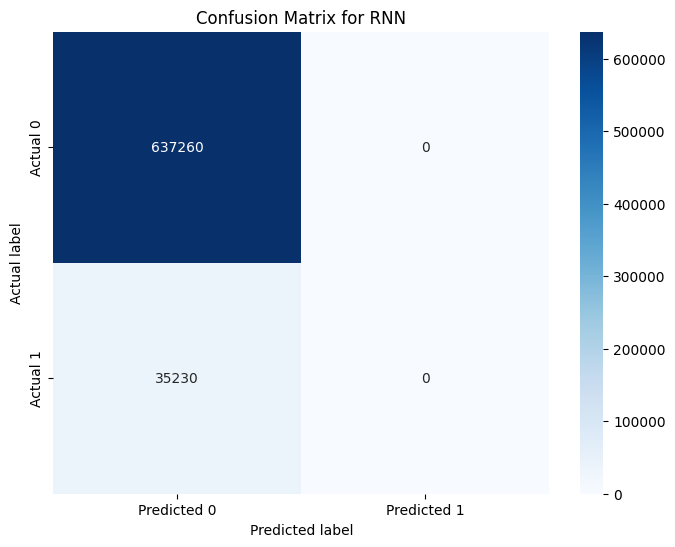

21016/21016 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step


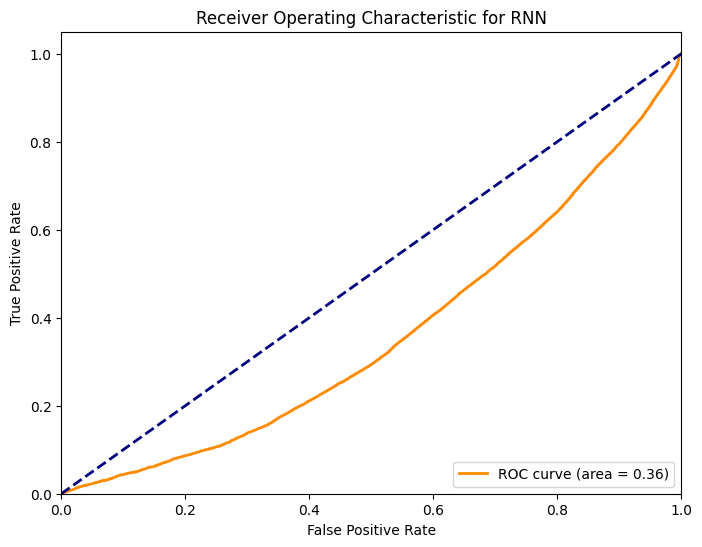

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for RNN Model:


,Metric,Value
0,Accuracy,0.947613
1,Precision,0.000000
2,Recall,0.000000
3,F1-Score,0.000000
4,TPR,0.000000
5,FPR,0.000000
6,TNR,1.000000
7,FNR,1.000000
8,Youden's J,0.000000


In [15]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

input_shape = (X_train.shape[1], X_train.shape[2])
rnn_model = create_rnn_model(input_shape)

rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred_rnn = (rnn_model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred_rnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for RNN')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = rnn_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for RNN')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test, y_pred_rnn)
precision = precision_score(y_test, y_pred_rnn)
recall = recall_score(y_test, y_pred_rnn)
f1 = f1_score(y_test, y_pred_rnn)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
print("Metrics for RNN Model:")
metrics_df

6504/6504 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


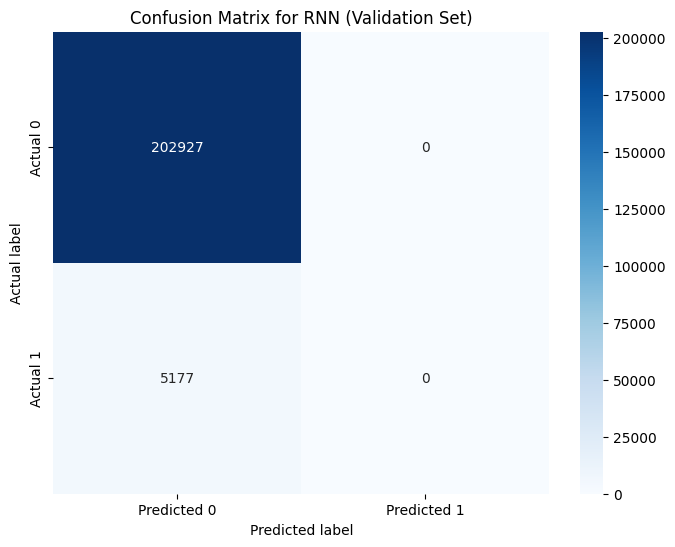

6504/6504 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


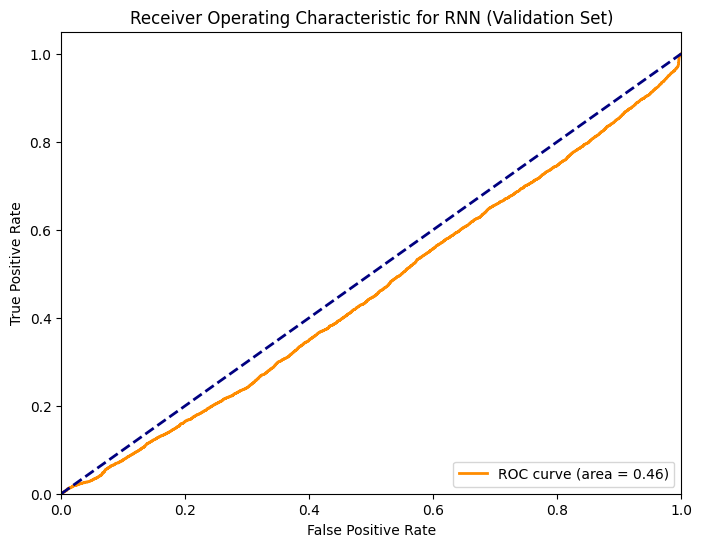

Metrics for RNN Model (Validation Set):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Metric,Value
0,Accuracy,0.975123
1,Precision,0.000000
2,Recall,0.000000
3,F1-Score,0.000000
4,TPR,0.000000
5,FPR,0.000000
6,TNR,1.000000
7,FNR,1.000000
8,Youden's J,0.000000


In [16]:
X_val = X_val.values.reshape(X_val.shape[0], 1, X_val.shape[1])

y_pred_rnn_val = (rnn_model.predict(X_val) > 0.5).astype("int32")

cm_val = confusion_matrix(y_val, y_pred_rnn_val)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for RNN (Validation Set)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob_val = rnn_model.predict(X_val)
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_pred_prob_val)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for RNN (Validation Set)')
plt.legend(loc="lower right")
plt.show()

accuracy_val = accuracy_score(y_val, y_pred_rnn_val)
precision_val = precision_score(y_val, y_pred_rnn_val)
recall_val = recall_score(y_val, y_pred_rnn_val)
f1_val = f1_score(y_val, y_pred_rnn_val)
tn_val, fp_val, fn_val, tp_val = cm_val.ravel()
tpr_val = tp_val / (tp_val + fn_val)
fpr_val = fp_val / (fp_val + tn_val)
tnr_val = tn_val / (tn_val + fp_val)
fnr_val = fn_val / (tp_val + fn_val)
j_val = tpr_val - fpr_val

metrics_val = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy_val, precision_val, recall_val, f1_val, tpr_val, fpr_val, tnr_val, fnr_val, j_val]
}
metrics_df_val = pd.DataFrame(metrics_val)
print("Metrics for RNN Model (Validation Set):")
metrics_df_val

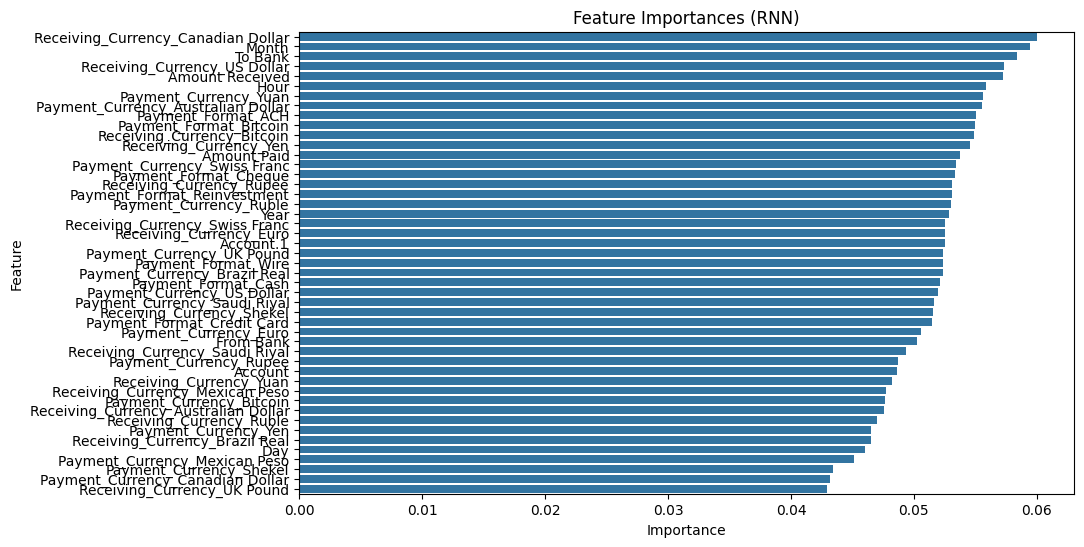

In [17]:
X_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_train.csv')

lstm_weights = rnn_model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:X_train.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (RNN)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

###30 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 75s 2ms/step - accuracy: 0.9990 - loss: 0.0062 - val_accuracy: 0.2070 - val_loss: 21.2890
Epoch 2/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 1.0000 - loss: 2.9776e-11 - val_accuracy: 0.2070 - val_loss: 26.1008
Epoch 3/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - accuracy: 1.0000 - loss: 9.0697e-12 - val_accuracy: 0.2070 - val_loss: 24.9351
Epoch 4/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - accuracy: 1.0000 - loss: 5.7030e-12 - val_accuracy: 0.2070 - val_loss: 24.5727
Epoch 5/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 1.0000 - loss: 3.9826e-12 - val_accuracy: 0.2070 - val_loss: 26.2677
Epoch 6/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 1.0000 - loss: 2.9058e-12 - val_accuracy: 0.2070 - val_loss: 28.6445
Epoch 7/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - accuracy: 1.0000 - loss: 2.1753e-12 - val_accuracy: 0.2070 - val_loss: 30.5716
Epoch 8/30
35552/35552 ━━━━━━━━━━━━━━━

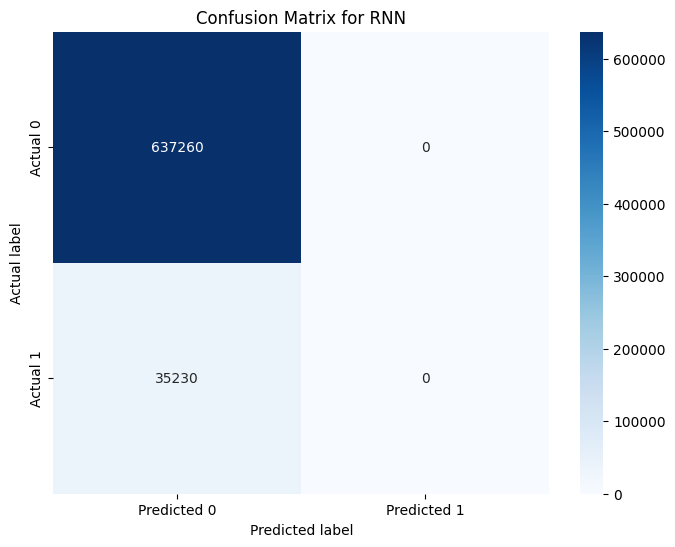

21016/21016 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step


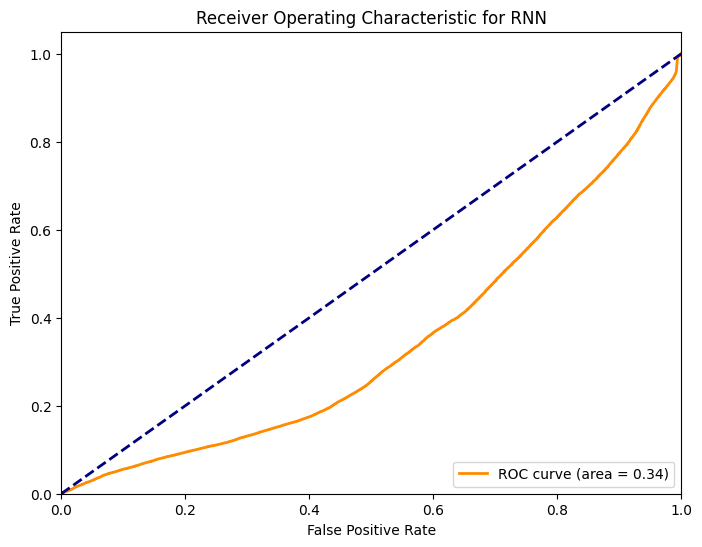

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for RNN Model:


,Metric,Value
0,Accuracy,0.947613
1,Precision,0.000000
2,Recall,0.000000
3,F1-Score,0.000000
4,TPR,0.000000
5,FPR,0.000000
6,TNR,1.000000
7,FNR,1.000000
8,Youden's J,0.000000


In [19]:
X_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_test.csv')
X_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_val.csv')
y_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_val.csv')

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)

X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

input_shape = (X_train.shape[1], X_train.shape[2])
rnn_model = create_rnn_model(input_shape)

rnn_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

y_pred_rnn = (rnn_model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred_rnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for RNN')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = rnn_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for RNN')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test, y_pred_rnn)
precision = precision_score(y_test, y_pred_rnn)
recall = recall_score(y_test, y_pred_rnn)
f1 = f1_score(y_test, y_pred_rnn)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
print("Metrics for RNN Model:")
metrics_df

6504/6504 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


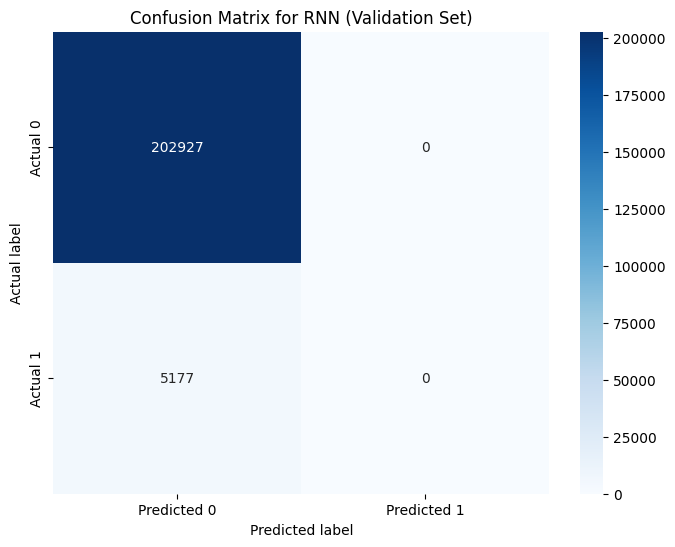

6504/6504 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


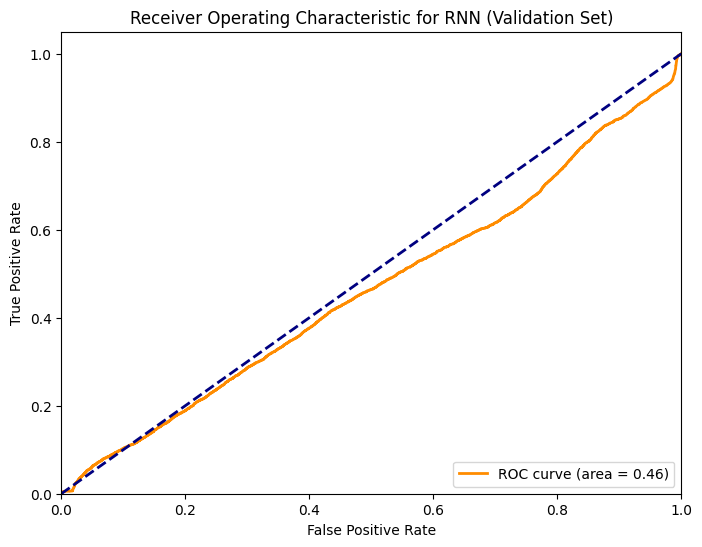

Metrics for RNN Model (Validation Set):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Metric,Value
0,Accuracy,0.975123
1,Precision,0.000000
2,Recall,0.000000
3,F1-Score,0.000000
4,TPR,0.000000
5,FPR,0.000000
6,TNR,1.000000
7,FNR,1.000000
8,Youden's J,0.000000


In [20]:
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)

X_val = X_val.values.reshape(X_val.shape[0], 1, X_val.shape[1])

y_pred_rnn_val = (rnn_model.predict(X_val) > 0.5).astype("int32")

cm_val = confusion_matrix(y_val, y_pred_rnn_val)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for RNN (Validation Set)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob_val = rnn_model.predict(X_val)
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_pred_prob_val)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for RNN (Validation Set)')
plt.legend(loc="lower right")
plt.show()

accuracy_val = accuracy_score(y_val, y_pred_rnn_val)
precision_val = precision_score(y_val, y_pred_rnn_val)
recall_val = recall_score(y_val, y_pred_rnn_val)
f1_val = f1_score(y_val, y_pred_rnn_val)
tn_val, fp_val, fn_val, tp_val = cm_val.ravel()
tpr_val = tp_val / (tp_val + fn_val)
fpr_val = fp_val / (fp_val + tn_val)
tnr_val = tn_val / (tn_val + fp_val)
fnr_val = fn_val / (tp_val + fn_val)
j_val = tpr_val - fpr_val

metrics_val = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy_val, precision_val, recall_val, f1_val, tpr_val, fpr_val, tnr_val, fnr_val, j_val]
}
metrics_df_val = pd.DataFrame(metrics_val)
print("Metrics for RNN Model (Validation Set):")
metrics_df_val

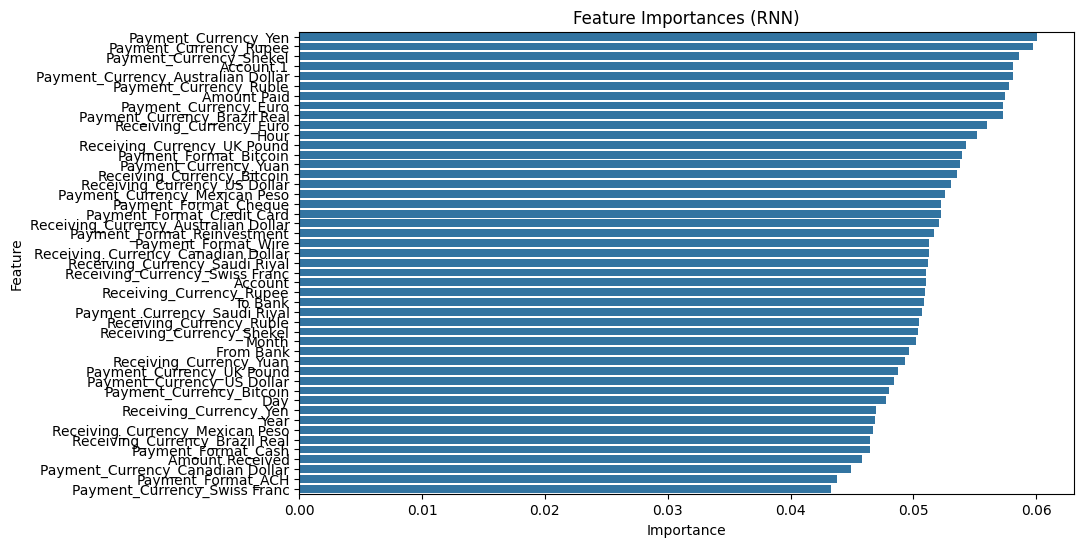

In [21]:
X_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_train.csv')

lstm_weights = rnn_model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:X_train.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (RNN)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#Long Short Term Memory (LSTM)

In [22]:
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.3))
    model.add(LSTM(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

##10 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 75s 2ms/step - accuracy: 0.9995 - loss: 0.0054 - val_accuracy: 0.2070 - val_loss: 21.7399
Epoch 2/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 1.0000 - loss: 2.8828e-11 - val_accuracy: 0.2070 - val_loss: 22.7374
Epoch 3/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 1.0000 - loss: 9.2708e-12 - val_accuracy: 0.2070 - val_loss: 25.1994
Epoch 4/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 1.0000 - loss: 6.0673e-12 - val_accuracy: 0.2070 - val_loss: 25.9208
Epoch 5/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 1.0000 - loss: 3.8120e-12 - val_accuracy: 0.2070 - val_loss: 25.0051
Epoch 6/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 1.0000 - loss: 2.5995e-12 - val_accuracy: 0.2070 - val_loss: 26.4276
Epoch 7/10
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 1.0000 - loss: 2.6039e-12 - val_accuracy: 0.2070 - val_loss: 27.9921
Epoch 8/10
35552/35552 ━━━━━━━━━━━━━━━

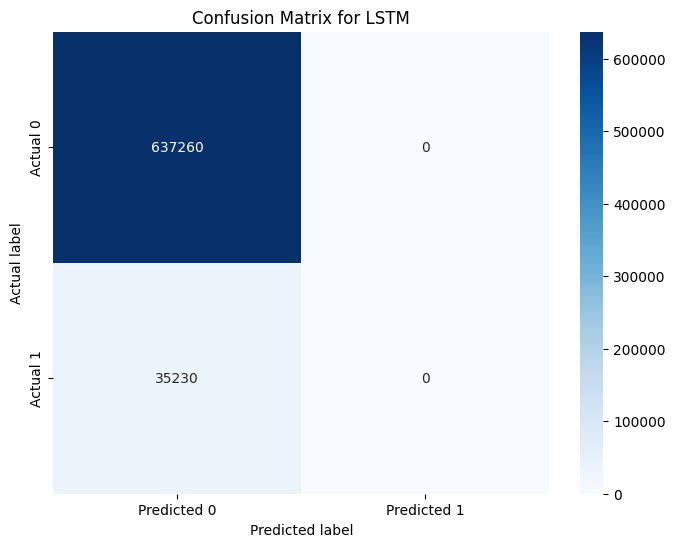

21016/21016 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step


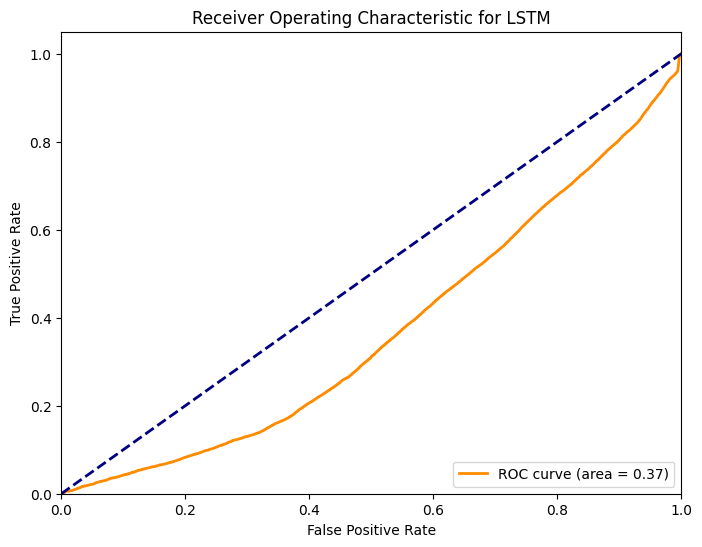

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for LSTM Model:


,Metric,Value
0,Accuracy,0.947613
1,Precision,0.000000
2,Recall,0.000000
3,F1-Score,0.000000
4,TPR,0.000000
5,FPR,0.000000
6,TNR,1.000000
7,FNR,1.000000
8,Youden's J,0.000000


In [23]:
X_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_test.csv')

X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

input_shape = (X_train.shape[1], X_train.shape[2])
lstm_model = create_lstm_model(input_shape)

lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred_lstm = (lstm_model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred_lstm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for LSTM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = lstm_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for LSTM')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test, y_pred_lstm)
precision = precision_score(y_test, y_pred_lstm)
recall = recall_score(y_test, y_pred_lstm)
f1 = f1_score(y_test, y_pred_lstm)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
print("Metrics for LSTM Model:")
metrics_df

6504/6504 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


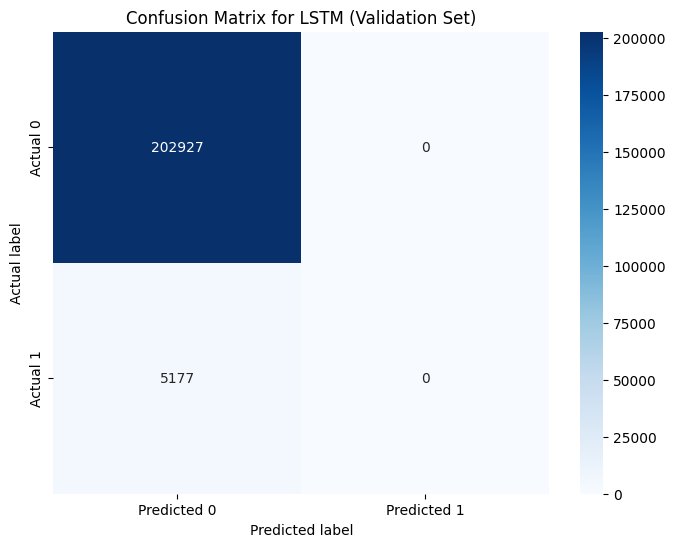

6504/6504 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


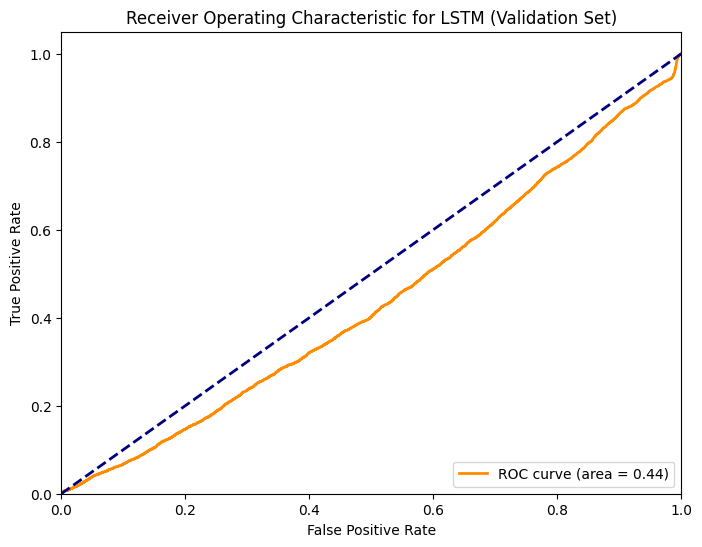

Metrics for LSTM Model (Validation Set):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Metric,Value
0,Accuracy,0.975123
1,Precision,0.000000
2,Recall,0.000000
3,F1-Score,0.000000
4,TPR,0.000000
5,FPR,0.000000
6,TNR,1.000000
7,FNR,1.000000
8,Youden's J,0.000000


In [24]:
X_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_val.csv')
y_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_val.csv')
X_val = X_val.values.reshape(X_val.shape[0], 1, X_val.shape[1])
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)

y_pred_lstm_val = (lstm_model.predict(X_val) > 0.5).astype("int32")

cm_val = confusion_matrix(y_val, y_pred_lstm_val)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for LSTM (Validation Set)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob_val = lstm_model.predict(X_val)
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_pred_prob_val)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for LSTM (Validation Set)')
plt.legend(loc="lower right")
plt.show()

accuracy_val = accuracy_score(y_val, y_pred_lstm_val)
precision_val = precision_score(y_val, y_pred_lstm_val)
recall_val = recall_score(y_val, y_pred_lstm_val)
f1_val = f1_score(y_val, y_pred_lstm_val)
tn_val, fp_val, fn_val, tp_val = cm_val.ravel()
tpr_val = tp_val / (tp_val + fn_val)
fpr_val = fp_val / (fp_val + tn_val)
tnr_val = tn_val / (tn_val + fp_val)
fnr_val = fn_val / (tp_val + fn_val)
j_val = tpr_val - fpr_val

metrics_val = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy_val, precision_val, recall_val, f1_val, tpr_val, fpr_val, tnr_val, fnr_val, j_val]
}
metrics_df_val = pd.DataFrame(metrics_val)
print("Metrics for LSTM Model (Validation Set):")
metrics_df_val

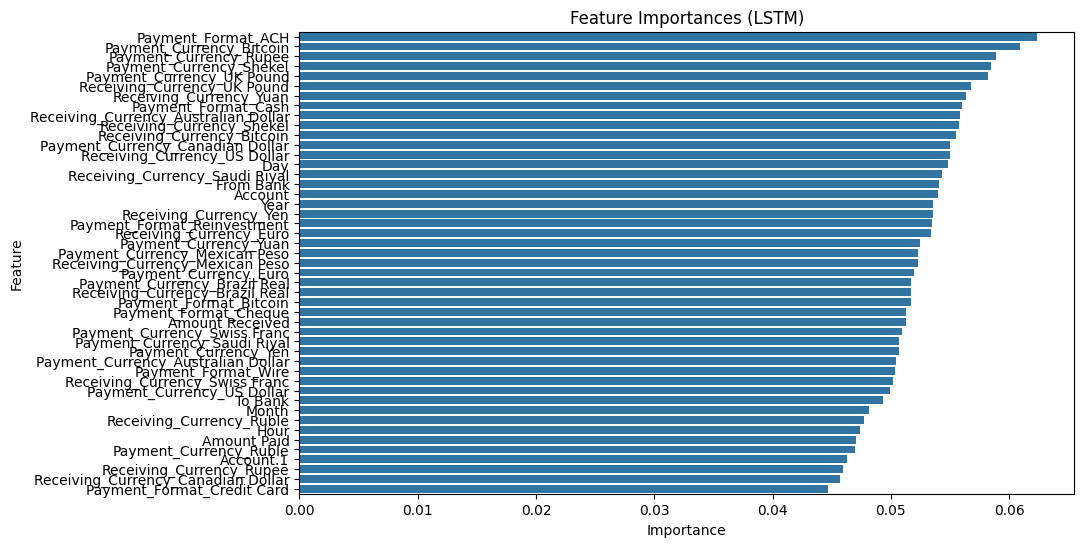

In [25]:
X_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_train.csv')

lstm_weights = lstm_model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:X_train.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (LSTM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##30 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 76s 2ms/step - accuracy: 0.9969 - loss: 0.0097 - val_accuracy: 0.2070 - val_loss: 21.5976
Epoch 2/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 1.0000 - loss: 2.1979e-11 - val_accuracy: 0.2070 - val_loss: 27.2268
Epoch 3/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 1.0000 - loss: 6.5200e-12 - val_accuracy: 0.2070 - val_loss: 24.4076
Epoch 4/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 1.0000 - loss: 3.1271e-12 - val_accuracy: 0.2070 - val_loss: 26.7388
Epoch 5/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 1.0000 - loss: 2.4781e-12 - val_accuracy: 0.2070 - val_loss: 24.7085
Epoch 6/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 1.0000 - loss: 1.8143e-12 - val_accuracy: 0.2070 - val_loss: 27.1941
Epoch 7/30
35552/35552 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 1.0000 - loss: 1.6427e-12 - val_accuracy: 0.2070 - val_loss: 25.2841
Epoch 8/30
35552/35552 ━━━━━━━━━━━━━━━

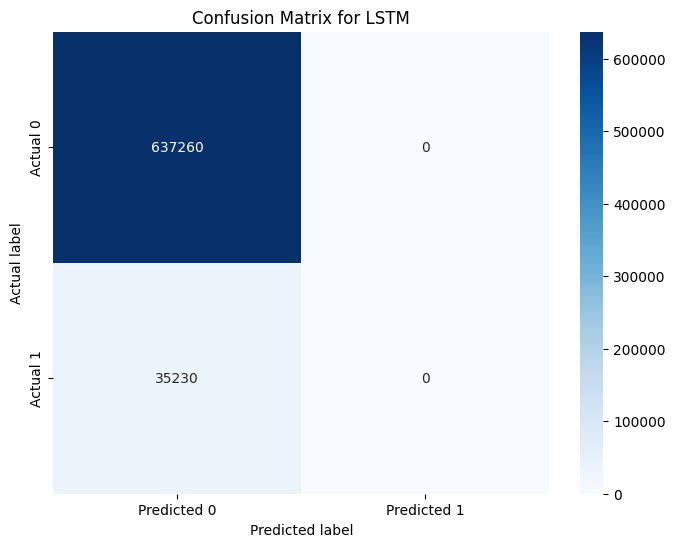

21016/21016 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step


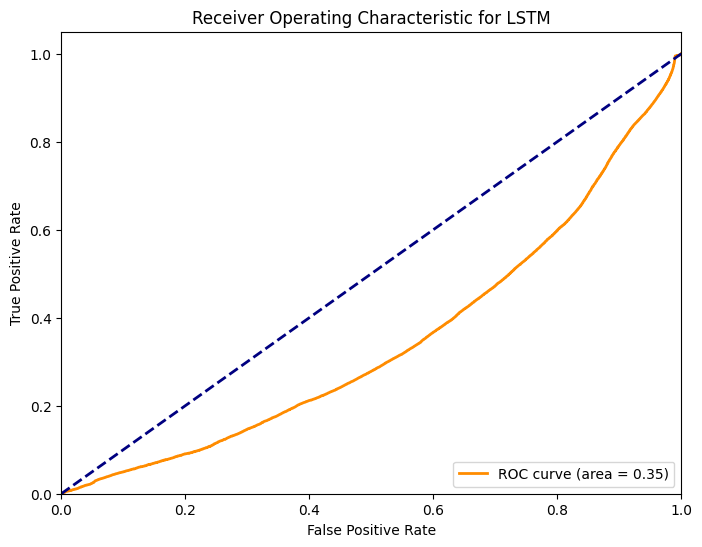

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for LSTM Model:


,Metric,Value
0,Accuracy,0.947613
1,Precision,0.000000
2,Recall,0.000000
3,F1-Score,0.000000
4,TPR,0.000000
5,FPR,0.000000
6,TNR,1.000000
7,FNR,1.000000
8,Youden's J,0.000000


In [26]:
X_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_test.csv')

X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

input_shape = (X_train.shape[1], X_train.shape[2])
lstm_model = create_lstm_model(input_shape)

lstm_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

y_pred_lstm = (lstm_model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred_lstm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for LSTM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = lstm_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for LSTM')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test, y_pred_lstm)
precision = precision_score(y_test, y_pred_lstm)
recall = recall_score(y_test, y_pred_lstm)
f1 = f1_score(y_test, y_pred_lstm)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
print("Metrics for LSTM Model:")
metrics_df

6504/6504 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


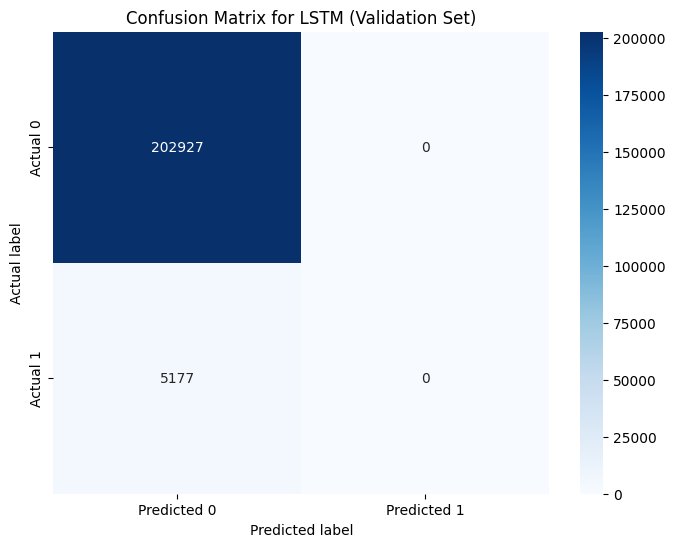

6504/6504 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


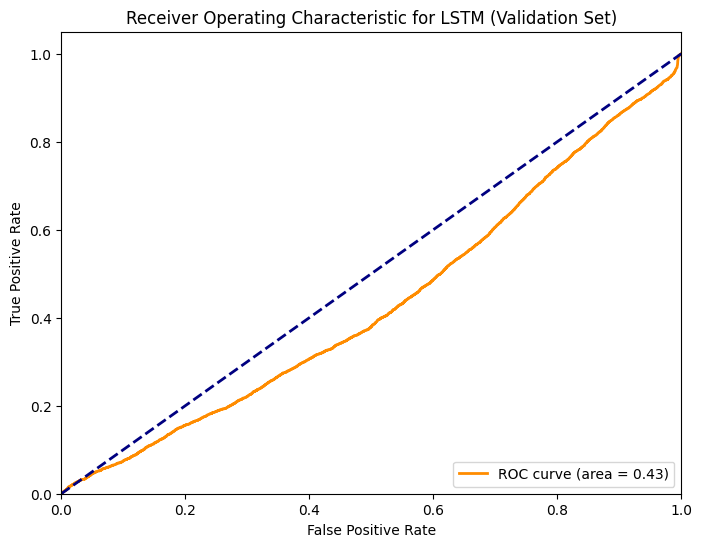

Metrics for LSTM Model (Validation Set):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Metric,Value
0,Accuracy,0.975123
1,Precision,0.000000
2,Recall,0.000000
3,F1-Score,0.000000
4,TPR,0.000000
5,FPR,0.000000
6,TNR,1.000000
7,FNR,1.000000
8,Youden's J,0.000000


In [27]:
X_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_val.csv')
y_val = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/y_val.csv')
X_val = X_val.values.reshape(X_val.shape[0], 1, X_val.shape[1])
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)

y_pred_lstm_val = (lstm_model.predict(X_val) > 0.5).astype("int32")

cm_val = confusion_matrix(y_val, y_pred_lstm_val)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for LSTM (Validation Set)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob_val = lstm_model.predict(X_val)
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_pred_prob_val)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for LSTM (Validation Set)')
plt.legend(loc="lower right")
plt.show()

accuracy_val = accuracy_score(y_val, y_pred_lstm_val)
precision_val = precision_score(y_val, y_pred_lstm_val)
recall_val = recall_score(y_val, y_pred_lstm_val)
f1_val = f1_score(y_val, y_pred_lstm_val)
tn_val, fp_val, fn_val, tp_val = cm_val.ravel()
tpr_val = tp_val / (tp_val + fn_val)
fpr_val = fp_val / (fp_val + tn_val)
tnr_val = tn_val / (tn_val + fp_val)
fnr_val = fn_val / (tp_val + fn_val)
j_val = tpr_val - fpr_val

metrics_val = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy_val, precision_val, recall_val, f1_val, tpr_val, fpr_val, tnr_val, fnr_val, j_val]
}
metrics_df_val = pd.DataFrame(metrics_val)
print("Metrics for LSTM Model (Validation Set):")
metrics_df_val

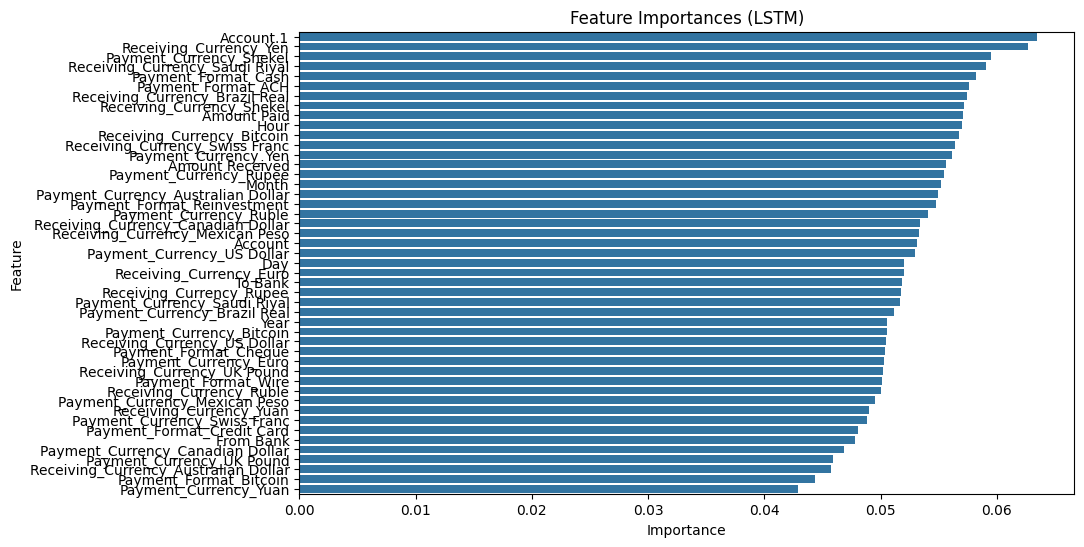

In [28]:
X_train = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/X_train.csv')

lstm_weights = lstm_model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:X_train.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (LSTM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()